In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [84]:
from datetime import datetime, timedelta

In [85]:
np.random.seed(1)

In [86]:
rows=120

In [144]:
col_1=np.random.normal(50,10,rows).astype(int)
col_2=np.random.uniform(0,100,rows).astype(int)

In [145]:
# choose random ind
rand_ind=np.random.choice(rows,7,replace=False)   #replace=False prevent duplicates
# ensure=We get 6 different rows
#No row is selected twice
col_1[rand_ind]=np.random.uniform(80,110,7).astype(int)   #choice() → picks where outliers go , 7-pos
#uniform() → creates big numbers for outliers
print(col_1)

[ 55  54  98  58  29  38  44  45  55  43  44  39  65  59  35  42  48  53
  33  68  40  32  55  53  31  51  58  58  57  45  61  43  33  48  43  35
  41  61  61  49  48  47  40  46  44  62  51  47  48  28  53  68  58  41
  56  48  41  49  38  47  69  56  48  53  60  50  57  37  45  80  82  56
  48  63  41  55  59  53  48  59  57  45  46  48  57  21  49  42  50  31
  54  49  37  51  35  36  54  48  56  48  54  60 102  32  59  65 100  49
  32  47  54  68  53  89  87  55  56  50  60  41]


In [146]:
col_3=np.random.choice(['A','B','C'],rows)
col_4=np.random.choice(['X','Y'],rows)

In [147]:
col_5=pd.date_range("2025-10-01",periods=rows,freq="D")
col_5

DatetimeIndex(['2025-10-01', '2025-10-02', '2025-10-03', '2025-10-04',
               '2025-10-05', '2025-10-06', '2025-10-07', '2025-10-08',
               '2025-10-09', '2025-10-10',
               ...
               '2026-01-19', '2026-01-20', '2026-01-21', '2026-01-22',
               '2026-01-23', '2026-01-24', '2026-01-25', '2026-01-26',
               '2026-01-27', '2026-01-28'],
              dtype='datetime64[ns]', length=120, freq='D')

In [148]:
col_6=np.random.choice(['val1','val2','val3',None],
                      rows,
                      p=[0.3,0.3,0.22,0.18])
col_7= np.where(np.random.rand(rows)<0.18,None,np.random.randint(1,100,rows))
print(col_7)

[None 45 None None 88 57 50 48 None 60 94 83 81 99 93 39 11 88 66 96 89 60
 74 96 92 None 51 52 83 83 52 None None 56 69 66 38 58 None None 45 58
 None 33 28 56 64 81 92 77 57 27 63 54 93 23 39 21 59 44 None 46 76 38 85
 35 88 59 None None 86 38 59 None 25 None 84 42 95 28 33 15 26 14 79 37
 None 4 57 94 32 29 None 3 61 60 None 41 16 38 8 None 39 48 61 61 49 83 9
 86 69 40 64 55 14 None 41 74 75 69]


In [149]:
df=pd.DataFrame({
    'numeric_1':col_1,
    'numeric_2':col_2,
    'category_1':col_3,
    'category_2':col_4,
    'date':col_5,
    'missing_col':col_6,
    'missing_num_col':col_7
})

In [150]:
print(df)

     numeric_1  numeric_2 category_1 category_2       date missing_col  \
0           55         51          B          X 2025-10-01        val1   
1           54          7          C          X 2025-10-02        val2   
2           98         30          B          Y 2025-10-03        val1   
3           58         62          A          Y 2025-10-04        val1   
4           29         64          A          Y 2025-10-05        val2   
..         ...        ...        ...        ...        ...         ...   
115         55         49          A          X 2026-01-24        val1   
116         56         87          B          Y 2026-01-25        val1   
117         50         85          C          Y 2026-01-26        val1   
118         60         79          B          X 2026-01-27        val1   
119         41         50          A          Y 2026-01-28        None   

    missing_num_col  
0              None  
1                45  
2              None  
3              None  
4

In [151]:
df.head()


,numeric_1,numeric_2,category_1,category_2,date,missing_col,missing_num_col
0,55,51,B,X,2025-10-01,val1,None
1,54,7,C,X,2025-10-02,val2,45
2,98,30,B,Y,2025-10-03,val1,None
3,58,62,A,Y,2025-10-04,val1,None
4,29,64,A,Y,2025-10-05,val2,88


In [152]:
df.tail()

,numeric_1,numeric_2,category_1,category_2,date,missing_col,missing_num_col
115,55,49,A,X,2026-01-24,val1,None
116,56,87,B,Y,2026-01-25,val1,41
117,50,85,C,Y,2026-01-26,val1,74
118,60,79,B,X,2026-01-27,val1,75
119,41,50,A,Y,2026-01-28,None,69


In [153]:
df.describe()

,numeric_1,numeric_2,date
count,120.000000,120.000000,120
mean,51.383333,52.900000,2025-11-29 12:00:00
min,21.000000,2.000000,2025-10-01 00:00:00
25%,43.000000,30.750000,2025-10-30 18:00:00
50%,49.500000,53.000000,2025-11-29 12:00:00
75%,57.000000,75.000000,2025-12-29 06:00:00
max,102.000000,99.000000,2026-01-28 00:00:00
std,13.881360,27.308201,NaN


In [154]:
df.describe(include='object')

,category_1,category_2,missing_col,missing_num_col
count,120,120,94,100
unique,3,2,3,62
top,C,X,val1,83
freq,47,65,50,4


In [155]:
df.shape

(120, 7)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   numeric_1        120 non-null    int64         
 1   numeric_2        120 non-null    int64         
 2   category_1       120 non-null    object        
 3   category_2       120 non-null    object        
 4   date             120 non-null    datetime64[ns]
 5   missing_col      94 non-null     object        
 6   missing_num_col  100 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 6.7+ KB


In [157]:
df.columns

Index(['numeric_1', 'numeric_2', 'category_1', 'category_2', 'date',
       'missing_col', 'missing_num_col'],
      dtype='object')

In [158]:
df.isna().sum()

numeric_1           0
numeric_2           0
category_1          0
category_2          0
date                0
missing_col        26
missing_num_col    20
dtype: int64

## handling missing values

In [159]:
##method 1 fill with a constant ============> imputation

df['missing_col'].fillna("unknown", inplace=True)
df.head()

,numeric_1,numeric_2,category_1,category_2,date,missing_col,missing_num_col
0,55,51,B,X,2025-10-01,val1,None
1,54,7,C,X,2025-10-02,val2,45
2,98,30,B,Y,2025-10-03,val1,None
3,58,62,A,Y,2025-10-04,val1,None
4,29,64,A,Y,2025-10-05,val2,88


In [160]:
#................ fill with the most frequent element...........
#df_fill_mode = df.copy()
#mode_val = df_fill_mode['missing_num_col'].mode()[0] #Select the first mode value from the list of modes returned by .mode(). when repetation is their
#df_fill_mode['missing_num_col'] = df_fill_mode['missing_num_col'].fillna(mode_val)
#print(df_fill_mode.head())
## for dropping row with missing value ==========> f_drop_rows = df.dropna()

In [161]:

df['missing_num_col'].fillna(df['missing_num_col'].mean(), inplace=True)
#df_fill_mean['numeric_2'] = df_fill_mean['numeric_2'].fillna(df_fill_mean['numeric_2'].median())
df.head()

,numeric_1,numeric_2,category_1,category_2,date,missing_col,missing_num_col
0,55,51,B,X,2025-10-01,val1,55.99
1,54,7,C,X,2025-10-02,val2,45.00
2,98,30,B,Y,2025-10-03,val1,55.99
3,58,62,A,Y,2025-10-04,val1,55.99
4,29,64,A,Y,2025-10-05,val2,88.00


In [162]:
df.isna().sum()


numeric_1          0
numeric_2          0
category_1         0
category_2         0
date               0
missing_col        0
missing_num_col    0
dtype: int64

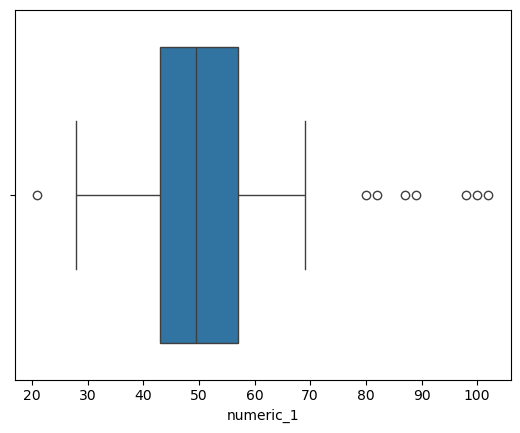

In [163]:
import seaborn as sns
sns.boxplot(x=df.numeric_1)
plt.show()

In [169]:
#======= outlier detection 
# ----------------------------------IQR-------------
q1= df['numeric_1'].quantile(0.25)
q3=df['numeric_1'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+ 1.5*iqr
iqr_outliers=df[(df['numeric_1']<lb) | (df['numeric_1']>up)]
print("IQR method - outlier detection: ")
print(q1,q3,iqr,lb,ub)

IQR method - outlier detection: 
43.0 57.0 14.0 22.0 78.0                      numeric_1  numeric_2 category_1 category_2       date missing_col  \
2           98         30          B          Y 2025-10-03        val1   
69          80         30          C          Y 2025-12-09        val1   
70          82         47          A          X 2025-12-10        val2   
85          21         72          B          Y 2025-12-25        val2   
102        102         34          B          X 2026-01-11     unknown   
106        100         54          A          X 2026-01-15        val1   
113         89         92          A          X 2026-01-22        val3   
114         87          5          A          X 2026-01-23        val1   

     missing_num_col  
2              55.99  
69             55.99  
70             86.00  
85             37.00  
102            39.00  
106            49.00  
113            55.00  
114            14.00  


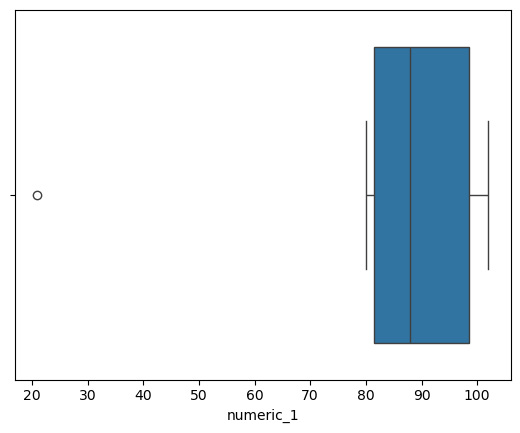

In [166]:
#sns.boxplot(data=iqr_outliers,x='numeric_1')
#plt.show()

In [199]:
from scipy import stats
z_score =np.abs(stats.zscore(df['numeric_1']))

z_outliers=df[z_score>2]
print("Z-Score Method - Outliers detected:")
print(z_outliers)

Z-Score Method - Outliers detected:
    numeric_1  numeric_2 category_1 category_2       date missing_col  \
2          98         30          B          Y 2025-10-03        val1   
69         80         30          C          Y 2025-12-09        val1   
85         21         72          B          Y 2025-12-25        val2   

    missing_num_col  
2             55.99  
69            55.99  
85            37.00  


In [177]:
#===============================Data type correction - categorical, datetime


df['category_1'] = df['category_1'].astype('category')
df['category_2'] = df['category_2'].astype('category')
df['missing_col'] = df['missing_col'].astype('category')
df.dtypes

numeric_1                   int64
numeric_2                   int64
category_1               category
category_2               category
date               datetime64[ns]
missing_col              category
missing_num_col           float64
dtype: object

In [192]:
#==========================Filtering - remove rows based on a logical condition
df[(df['numeric_1'] <= 100) & (df['category_2'] != 'X')]

df.shape

(55, 7)

In [193]:
cutoff = "2024-05-01"
df= df[df['date'] >= cutoff]
print(df_filtered.shape)

(55, 7)


In [194]:
df= df[df['missing_col'].notna()]
print(df_filtered.shape)

(55, 7)
